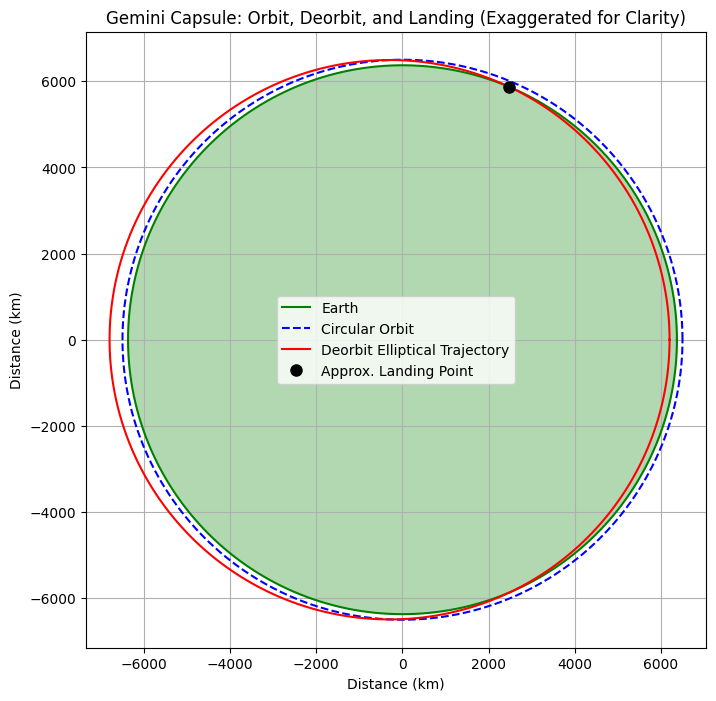

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters (in kilometers for clarity)
R_Earth = 6371  # Earth's radius in km

# Circular orbit parameters (e.g., altitude ~129 km above Earth, so r ≈ 6500 km)
orbit_radius = 6500  # km

# For an illustrative deorbit burn, let’s exaggerate the effect:
# We'll assume after the burn the ellipse has:
#   - Apogee at 6800 km (similar to the original orbit)
#   - Perigee at 6200 km (a lower altitude showing deorbiting)
apogee = 6800  # km
perigee = 6200  # km

# Semi-major axis and eccentricity of the elliptical deorbit trajectory:
a = (apogee + perigee) / 2
e = (apogee - perigee) / (apogee + perigee)

# Create an array of angles for the plots
theta = np.linspace(0, 2*np.pi, 500)

# Earth circle (using Earth's radius)
x_earth = R_Earth * np.cos(theta)
y_earth = R_Earth * np.sin(theta)

# Circular orbit (a simple circle with radius = orbit_radius)
x_orbit = orbit_radius * np.cos(theta)
y_orbit = orbit_radius * np.sin(theta)

# Elliptical deorbit trajectory (in polar coordinates)
# r(θ) = a(1 - e^2) / (1 + e*cos(θ))
r_ellipse = a * (1 - e**2) / (1 + e * np.cos(theta))
x_ellipse = r_ellipse * np.cos(theta)
y_ellipse = r_ellipse * np.sin(theta)

# Find approximate intersection (landing) point where the elliptical trajectory meets Earth’s surface.
# We'll search for the angle where the difference |r_ellipse - R_Earth| is minimized.
diff = np.abs(r_ellipse - R_Earth)
idx = np.argmin(diff)
x_land = x_ellipse[idx]
y_land = y_ellipse[idx]

# Plotting the results
plt.figure(figsize=(8,8))
plt.plot(x_earth, y_earth, 'g', label='Earth')
plt.fill(x_earth, y_earth, 'g', alpha=0.3)  # Fill Earth for clarity
plt.plot(x_orbit, y_orbit, 'b--', label='Circular Orbit')
plt.plot(x_ellipse, y_ellipse, 'r-', label='Deorbit Elliptical Trajectory')
plt.plot(x_land, y_land, 'ko', markersize=8, label='Approx. Landing Point')

plt.xlabel('Distance (km)')
plt.ylabel('Distance (km)')
plt.title('Gemini Capsule: Orbit, Deorbit, and Landing (Exaggerated for Clarity)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()



# Mathematics & Physics for understanding Orbital Mechanics

1. [Introduction](#Introduction)
    - Overview of the Notebook
    - Objectives
    - Prerequisites & Target Audience

2. [Mathematical Foundations](#2.-Mathematical-Foundations)
    1. [Basic Algebra & Trigonometry](#basic-algebra--trigonometry)
    2. [Coordinate Systems](#coordinate-systems)
        - Cartesian Coordinates
        - Polar Coordinates
        - Spherical Coordinates
        - *Interactive Python Exercise*
    3. [Vectors and Vector Operations](#vectors-and-vector-operations)
    4. [Introduction to Calculus](#introduction-to-calculus)
        - Derivatives and Rates of Change
        - Integrals and Accumulation
        - *Interactive Python Examples*

3. [Fundamentals of Physics for Orbital Mechanics](#fundamentals-of-physics-for-orbital-mechanics)
    1. [Newton’s Laws of Motion](#newtons-laws-of-motion)
    2. [Universal Law of Gravitation](#universal-law-of-gravitation)
    3. [Energy Principles](#energy-principles)
    4. [Drag and Atmospheric Resistance](#drag-and-atmospheric-resistance)

4. [Orbital Mechanics](#orbital-mechanics)
    1. [Kepler’s Laws of Planetary Motion](#keplers-laws-of-planetary-motion)
    2. [The Vis-Viva Equation](#the-vis-viva-equation)
    3. [Orbital Elements](#orbital-elements)
    4. [Conic Sections & Analytical Geometry](#conic-sections--analytical-geometry)
    5. [Determining the Orbit of a Capsule](#determining-the-orbit-of-a-capsule)

5. [Launch Windows and Trajectory Optimization](#launch-windows-and-trajectory-optimization)
    1. [Understanding Launch Windows](#understanding-launch-windows)
    2. [Calculating Launch Windows](#calculating-launch-windows)
    3. [Trajectory Optimization](#trajectory-optimization)
    4. [Interactive Simulation](#interactive-simulation)

6. [Deorbiting, Reentry, and Landing Coordinates](#deorbiting-reentry-and-landing-coordinates)
    1. [Principles of Deorbiting](#principles-of-deorbiting)
    2. [Reentry Dynamics](#reentry-dynamics)
    3. [Calculating the Landing Zone](#calculating-the-landing-zone)
    4. [Interactive Python Models](#interactive-python-models)

7. [Practical Applications with Python](#practical-applications-with-python)
    1. [Setting Up the Environment](#setting-up-the-environment)
    2. [Building Interactive Graphs and Simulations](#building-interactive-graphs-and-simulations)
    3. [Case Study: Gemini Capsule](#case-study-gemini-capsule)
    4. [Code Walkthroughs](#code-walkthroughs)

8. [Exercises and Practical Projects](#exercises-and-practical-projects)
    1. [Guided Exercises](#guided-exercises)
    2. [Project-Based Learning](#project-based-learning)
    3. [Real Mission Data Analysis](#real-mission-data-analysis)

9. [Conclusion and Further Reading](#conclusion-and-further-reading)
    1. [Recap](#recap)
    2. [Additional Resources](#additional-resources)
    3. [Final Thoughts](#final-thoughts)

10. [Appendices](#appendices)
    - [Glossary of Terms](#glossary-of-terms)
    - [Constants and Units](#constants-and-units)
    - [Python Code Utilities](#python-code-utilities)



# Introduction

Welcome to this interactive curriculum on the mathematics and physics behind launching and recovering space vehicles. In this notebook, we will build a comprehensive understanding of the underlying math, coordinate systems, and physics that allow engineers to determine launch windows, orbital trajectories, reentry paths, and landing coordinates for real-world spacecraft.

## Overview of the Notebook
This notebook is structured to guide you step-by-step through the essential topics required for space mission planning. We begin with fundamental mathematical concepts such as algebra, trigonometry, and coordinate systems, and progressively build up to advanced topics like orbital mechanics, trajectory optimization, and reentry dynamics. Each section includes interactive Python examples and visualizations to help reinforce the concepts and illustrate how real-world physics is applied in space missions.

## Objectives
By working through this curriculum, you will:
- **Learn** the fundamental mathematical and physical principles that underpin aerospace engineering.
- **Understand** various coordinate systems (Cartesian, polar, spherical) used to describe positions in space.
- **Explore** key physics principles including Newton’s laws, gravitation, energy conservation, and aerodynamic drag.
- **Derive and apply** essential equations, such as the vis-viva equation and the Tsiolkovsky rocket equation, with real-world units and values.
- **Gain hands-on experience** with Python to simulate and visualize spacecraft trajectories, launch windows, orbital paths, and deorbiting strategies.

## Prerequisites & Target Audience
This notebook is designed for learners with little to no background in advanced mathematics. If you have a basic understanding of algebra and high school physics, you’ll be well-prepared to start this journey. Each section is written to introduce more complex concepts progressively, with detailed explanations and interactive examples to support your learning.

Let's embark on this exciting journey into the mathematics and physics that make space exploration possible!


### 2.1 Basic Algebra & Trigonometry

**Overview:**  
Algebra and trigonometry are essential components of mathematics that form the groundwork for advanced topics such as calculus, physics, and orbital mechanics. In aerospace engineering, these subjects are used to model trajectories, determine launch angles, and solve for distances and forces. This section covers the fundamental concepts in algebra—including variables, equations, and functions—and introduces trigonometric ratios and identities with a focus on their real-world applications.

---

#### 2.1.1 Algebra: Variables, Equations, and Functions

**Variables and Expressions:**  
- **Variables** are symbols (e.g., $x$, $y$, $z$) that represent unknown quantities.  
- **Expressions** combine numbers, variables, and operations. For example, $3x + 2$ is an expression.

**Equations:**  
- An **equation** asserts that two expressions are equal. For example:
  $$
  3x + 2 = 11.
  $$
- **Solving an equation** involves finding the value of the variable that makes the equation true. For the above equation, subtract $2$ from both sides and then divide by $3$:
  $$
  3x = 9 \quad \Rightarrow \quad x = 3.
  $$

**Functions:**  
- A **function** is a relation that assigns each input exactly one output. For instance:
  $$
  f(x) = 2x + 1
  $$
  maps any $x$ to $2x + 1$.  
- **Graphing functions** helps visualize relationships; for example, the graph of $f(x) = 2x + 1$ is a straight line with slope 2 and a y-intercept of 1.

**Interactive Example:**  
Plot a linear function and a quadratic function to see how they behave. (See Python cell below.)

---

#### 2.1.2 Quadratic Equations and the Quadratic Formula

Quadratic equations take the form:
$$
ax^2 + bx + c = 0,
$$
with $a$, $b$, and $c$ as constants and $a \neq 0$.

**The Quadratic Formula:**  
The solutions for $x$ are:
$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}.
$$
- The term under the square root, $b^2 - 4ac$, is the **discriminant**:
  - If $b^2 - 4ac > 0$, there are two distinct real solutions.
  - If $b^2 - 4ac = 0$, there is one real (repeated) solution.
  - If $b^2 - 4ac < 0$, the solutions are complex.

**Example:**  
Solve:
$$
2x^2 - 4x - 6 = 0.
$$
Here, $a = 2$, $b = -4$, and $c = -6$. Substitute these values into the quadratic formula to determine $x$.

---

#### 2.1.3 Trigonometry: Right Triangles and Trigonometric Functions

**Right Triangle Basics:**  
- In a right triangle, one angle is $90^\circ$.  
- The sides are named based on their relation to an angle $\theta$:
  - **Opposite side:** Opposite $\theta$.
  - **Adjacent side:** Next to $\theta$ (but not the hypotenuse).
  - **Hypotenuse:** The longest side, opposite the right angle.

**Trigonometric Ratios:**  
For an angle $\theta$, the primary ratios are:
$$
\sin(\theta) = \frac{\text{opposite}}{\text{hypotenuse}}, \quad \cos(\theta) = \frac{\text{adjacent}}{\text{hypotenuse}}, \quad \tan(\theta) = \frac{\text{opposite}}{\text{adjacent}}.
$$

**Pythagorean Theorem:**  
The sides of a right triangle satisfy:
$$
\text{(hypotenuse)}^2 = (\text{opposite})^2 + (\text{adjacent})^2.
$$

**Trigonometric Identities:**  
- **Fundamental Identity:**
  $$
  \sin^2(\theta) + \cos^2(\theta) = 1.
  $$
- **Angle Sum/Difference Formulas:**  
  For example,
  $$
  \sin(\alpha \pm \beta) = \sin(\alpha)\cos(\beta) \pm \cos(\alpha)\sin(\beta).
  $$

**Applications in Aerospace:**  
- **Launch Angles:**  
  Trigonometry is used to calculate the correct launch angle and determine distances.  
- **Trajectory Calculations:**  
  If you know the distance to a target and the angle of elevation, you can compute the height using:
  $$
  \text{height} = \text{distance} \times \tan(\theta).
  $$

**Interactive Example:**  
Plot the trigonometric functions $\sin(x)$, $\cos(x)$, and $\tan(x)$ over a range of angles. (See Python cell below.)

---

#### 2.1.4 Applications and Problem Solving

Algebra and trigonometry are not only abstract mathematical topics—they are applied in practical aerospace problems such as:

- **Determining Launch Trajectories:**  
  Calculating angles and distances for safe and efficient launches.
- **Trajectory Estimation:**  
  Using quadratic equations to solve for the time or distance in projectile motion.
- **Force Decomposition:**  
  Splitting a force vector into horizontal and vertical components using sine and cosine.

A solid understanding of these topics is fundamental for success in more advanced aerospace studies.

---

#### 2.1.5 Summary of Key Formulas

- **Linear Equation:**
  $$
  y = mx + b.
  $$
- **Quadratic Equation and Formula:**
  $$
  ax^2 + bx + c = 0 \quad \Rightarrow \quad x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}.
  $$
- **Trigonometric Ratios in a Right Triangle:**
  $$
  \sin(\theta) = \frac{\text{opposite}}{\text{hypotenuse}}, \quad \cos(\theta) = \frac{\text{adjacent}}{\text{hypotenuse}}, \quad \tan(\theta) = \frac{\text{opposite}}{\text{adjacent}}.
  $$
- **Pythagorean Theorem:**
  $$
  \text{hypotenuse}^2 = \text{opposite}^2 + \text{adjacent}^2.
  $$
- **Fundamental Trigonometric Identity:**
  $$
  \sin^2(\theta) + \cos^2(\theta) = 1.
  $$

These formulas are the building blocks for solving a variety of problems in aerospace engineering and physics.

---

*Interactive Exercises:*  
Below are Python code examples to reinforce the algebra and trigonometry concepts discussed.




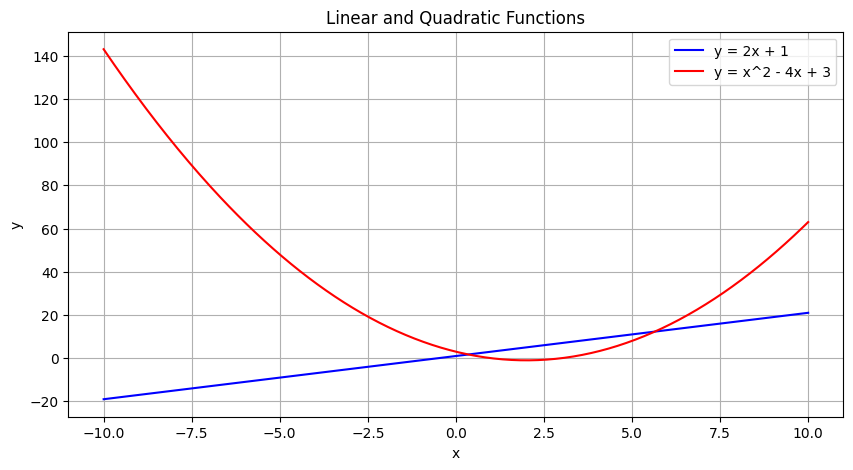

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define an array of x values
x = np.linspace(-10, 10, 400)

# Define a linear function: y = 2x + 1
y_linear = 2 * x + 1

# Define a quadratic function: y = x^2 - 4x + 3
y_quadratic = x**2 - 4*x + 3

plt.figure(figsize=(10, 5))
plt.plot(x, y_linear, label='y = 2x + 1', color='blue')
plt.plot(x, y_quadratic, label='y = x^2 - 4x + 3', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear and Quadratic Functions')
plt.legend()
plt.grid(True)
plt.show()


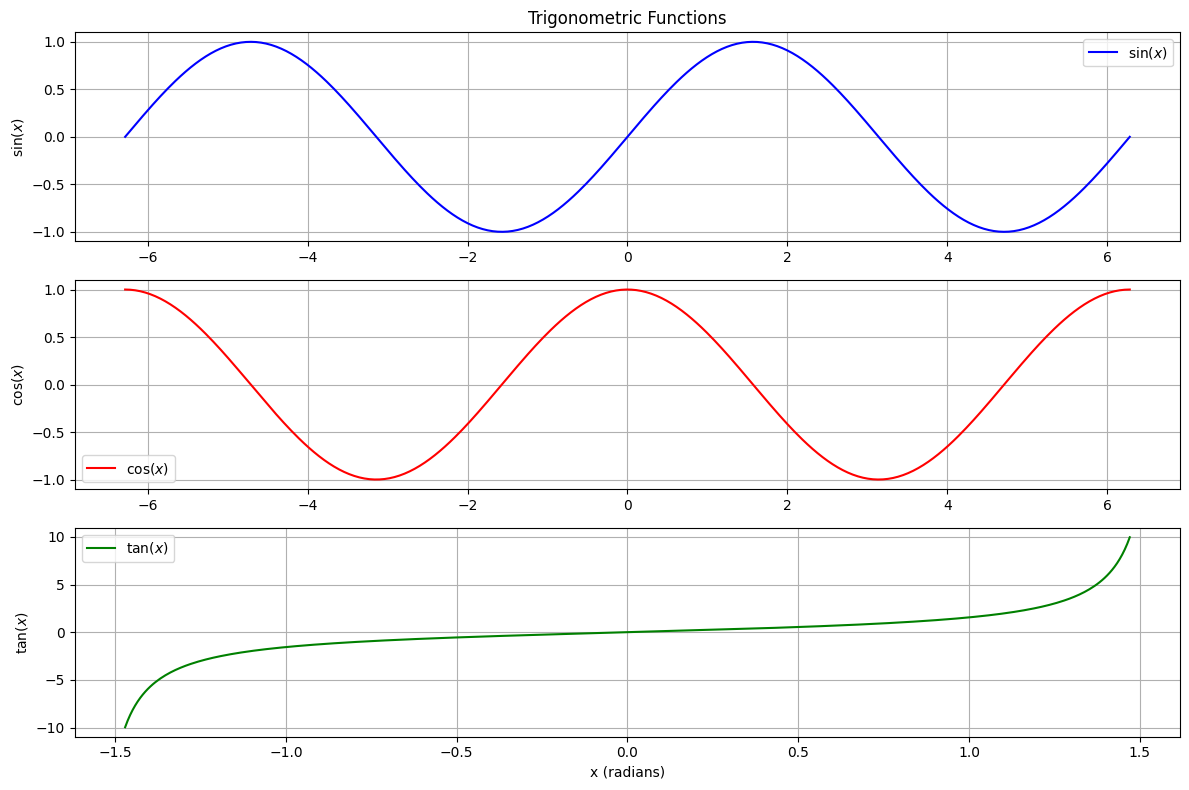

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of x values in radians for sine and cosine
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)

# Compute sine, cosine, and tangent values
y_sin = np.sin(x)
y_cos = np.cos(x)
# For tangent, restrict the domain to avoid asymptotes
x_tan = np.linspace(-np.pi/2 + 0.1, np.pi/2 - 0.1, 400)
y_tan = np.tan(x_tan)

plt.figure(figsize=(12, 8))

# Sine function
plt.subplot(3, 1, 1)
plt.plot(x, y_sin, label=r'$\sin(x)$', color='blue')
plt.title('Trigonometric Functions')
plt.ylabel(r'$\sin(x)$')
plt.grid(True)
plt.legend()

# Cosine function
plt.subplot(3, 1, 2)
plt.plot(x, y_cos, label=r'$\cos(x)$', color='red')
plt.ylabel(r'$\cos(x)$')
plt.grid(True)
plt.legend()

# Tangent function
plt.subplot(3, 1, 3)
plt.plot(x_tan, y_tan, label=r'$\tan(x)$', color='green')
plt.xlabel('x (radians)')
plt.ylabel(r'$\tan(x)$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


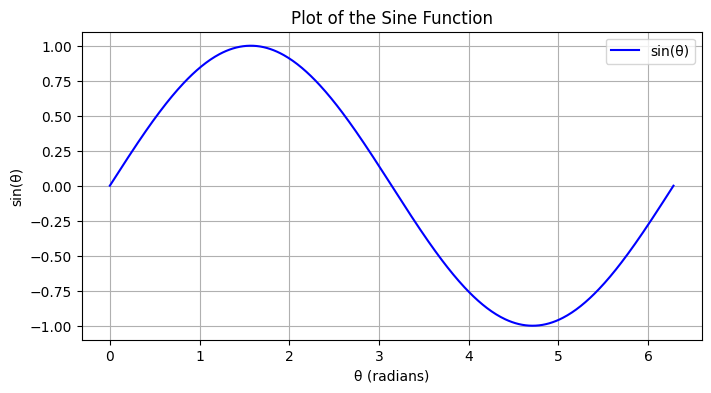

In [2]:
# Python Code Cell for 2.1: Plotting the Sine Function

import numpy as np
import matplotlib.pyplot as plt

# Define the range of angles (0 to 2π)
theta = np.linspace(0, 2 * np.pi, 500)
sine_values = np.sin(theta)

# Plot the sine function
plt.figure(figsize=(8, 4))
plt.plot(theta, sine_values, label='sin(θ)', color='blue')
plt.title('Plot of the Sine Function')
plt.xlabel('θ (radians)')
plt.ylabel('sin(θ)')
plt.grid(True)
plt.legend()
plt.show()


### 2.2 Coordinate Systems and Their Applications in Aerospace

In aerospace engineering and space mission planning, accurately describing the location of objects—whether a launch vehicle, satellite, or recovery site—is crucial. Different coordinate systems offer various advantages depending on the problem at hand. In this section, we discuss the most commonly used coordinate systems: Cartesian, polar, and spherical (including geographic coordinates). We also explain how these systems relate to real-world geographic locations, such as launch sites and recovery zones.

---

#### 2.2.1 Cartesian Coordinates

**Definition and Basics:**  
Cartesian coordinates describe points in space using orthogonal axes. In two dimensions, any point is given by an ordered pair $(x, y)$, while in three dimensions it is described by $(x, y, z)$.  
- **Advantages:**  
  - Simple and intuitive for problems with linear relationships.
  - Ideal for describing motions along straight lines and for engineering designs based on rectangular layouts.
- **Disadvantages:**  
  - Less convenient for problems with circular or spherical symmetry (e.g., orbits or Earth’s surface).

**Mathematical Representation:**  
In 2D, a point $P$ is represented as:
$$
P(x, y)
$$
and in 3D as:
$$
P(x, y, z).
$$

**Applications in Aerospace:**  
Cartesian coordinates are often used in local mission planning—for instance, when analyzing the ground trajectories of a vehicle during takeoff or landing within a relatively small area.

---

#### 2.2.2 Polar Coordinates

**Definition and Basics:**  
Polar coordinates describe a point in a plane using a radius and an angle. A point is given by:
$$
(r, \theta)
$$
where:
- $r$ is the distance from the origin.
- $\theta$ is the angle measured from the positive $x$-axis.

**Why Use Polar Coordinates?**  
- **Circular Symmetry:**  
  They simplify equations for circles and other curves with radial symmetry.
- **Natural for Orbits:**  
  When dealing with circular or elliptical orbits, expressing positions in terms of distance and angle is more natural.
  
**Orientation Note:**  
In most conventions, the angle $\theta = 0$ corresponds to the positive $x$-axis, and $\theta = 90^\circ$ (or $\pi/2$ radians) points upward along the positive $y$-axis. Some graphical tools might invert the $y$-axis or use a different convention, so it is important to be aware of the context.

**Conversion to Cartesian Coordinates:**  
The conversion formulas are:
$$
x = r \cos(\theta), \quad y = r \sin(\theta).
$$

**Applications in Aerospace:**  
Polar coordinates are particularly useful when analyzing the orbital paths of satellites or launch vehicles in a central gravitational field, where distances and angles from the center of mass (e.g., Earth's center) are the natural variables.

---

#### 2.2.3 Spherical Coordinates and Geographic (Geodetic) Systems

**Spherical Coordinates:**  
In three dimensions, spherical coordinates are used to represent points in space with three values:
$$
(r, \theta, \phi)
$$
where:
- $r$ is the distance from the origin.
- $\theta$ (the polar or colatitude angle) is measured from the positive $z$-axis.
- $\phi$ (the azimuthal angle) is measured in the $x$-$y$ plane from the positive $x$-axis.

**Conversion to Cartesian Coordinates:**  
The relationships are:
$$
x = r \sin(\theta) \cos(\phi), \quad y = r \sin(\theta) \sin(\phi), \quad z = r \cos(\theta).
$$

**Geographic Coordinates:**  
For Earth-based applications, we often use geographic or geodetic coordinates:
- **Latitude ($\phi$):**  
  Measures the angle north or south of the equator.
- **Longitude ($\lambda$):**  
  Measures the angle east or west of a prime meridian (usually Greenwich).
- **Altitude ($h$):**  
  The height above a reference ellipsoid (e.g., the WGS84 ellipsoid).

These are conceptually similar to spherical coordinates, but they account for the Earth's ellipsoidal shape rather than a perfect sphere. For most aerospace applications, especially for launch and recovery, the differences are small enough that spherical approximations work well, although precise navigation systems use geodetic coordinates.

**Applications in Aerospace:**  
- **Launch Locations:**  
  Launch sites (such as Cape Canaveral or Baikonur) are specified using latitude and longitude. Engineers use these coordinates to plan trajectories and compute launch windows relative to Earth’s rotation.
- **Recovery Zones:**  
  The recovery of space capsules or boosters is planned by mapping predicted landing sites in geographic coordinates, then transforming these coordinates into a local system for rescue operations.
- **Orbital Mechanics:**  
  Spherical coordinates (or the equivalent geodetic formulations) are used when calculating orbits, as the central gravitational force is best described in a radially symmetric system.

---

#### 2.2.4 Coordinate Transformations

**Why Transform Coordinates?**  
Different stages of a mission might require different coordinate systems. For example:
- Launch and recovery operations may use geographic coordinates.
- In-flight trajectory calculations often use Cartesian or polar coordinates centered on Earth.
- Post-mission analysis might convert between these systems to overlay flight paths on maps.

**Example Transformations:**
- **From Polar to Cartesian:**
  $$
  x = r \cos(\theta), \quad y = r \sin(\theta)
  $$
- **From Spherical to Cartesian:**
  $$
  x = r \sin(\theta) \cos(\phi), \quad y = r \sin(\theta) \sin(\phi), \quad z = r \cos(\theta)
  $$
- **From Geographic to Spherical:**  
  If a point has latitude $\varphi$, longitude $\lambda$, and altitude $h$, and assuming Earth’s radius is $R_E$, then:
  $$
  r = R_E + h, \quad \theta = 90^\circ - \varphi, \quad \phi = \lambda.
  $$
  (Here, $\theta$ is measured from the positive $z$-axis.)

---

#### 2.2.5 Summary and Relevance to Aerospace Operations

Understanding coordinate systems is vital for:
- **Accurate Navigation:**  
  Launch and recovery locations are defined in geographic coordinates, and these must be accurately transformed into the coordinate system used for trajectory analysis.
- **Trajectory Calculation:**  
  Describing orbital paths often involves switching between spherical, polar, and Cartesian systems.
- **Mission Planning:**  
  Engineers must be fluent in these transformations to coordinate between ground-based systems (maps, recovery zones) and flight dynamics (orbits and maneuvers).

This knowledge not only underpins the mathematics of spacecraft trajectories but also directly impacts practical operations such as launching, tracking, and recovering vehicles.

---

*Interactive Exercise:*  
The following Python examples will help illustrate these coordinate systems and transformations. In one cell, we will plot a circle using both Cartesian and polar representations, and in another cell, we will demonstrate how to convert geographic coordinates to Cartesian coordinates.



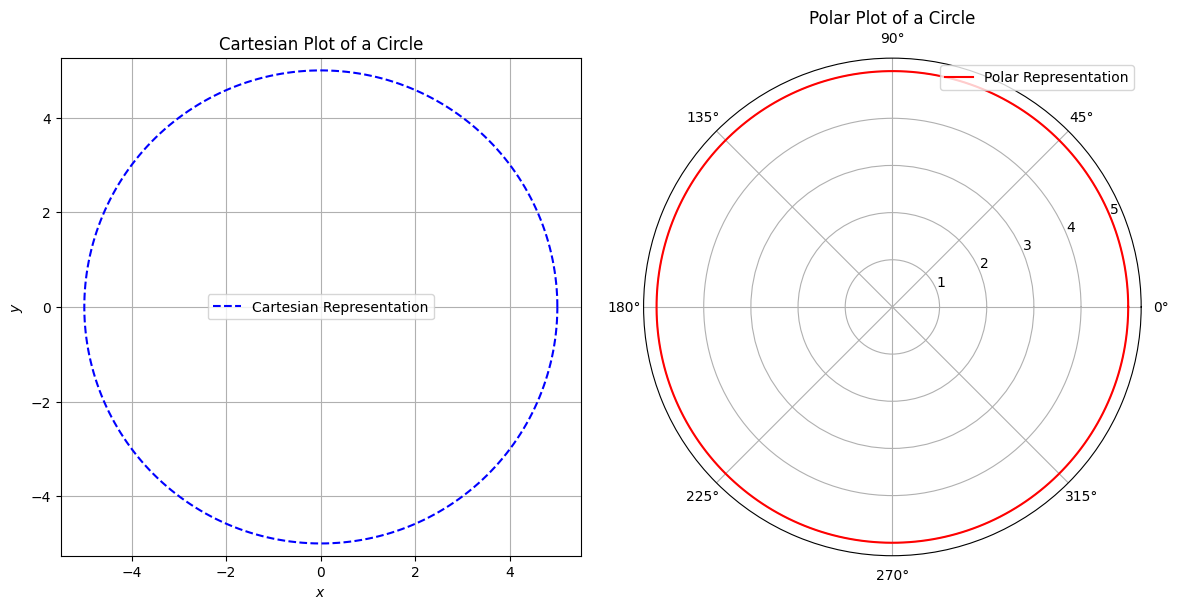

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the circle's radius
R = 5

# Create an array of angles from 0 to 2π
theta = np.linspace(0, 2 * np.pi, 500)

# Cartesian coordinates for the circle: x = R*cos(theta), y = R*sin(theta)
x = R * np.cos(theta)
y = R * np.sin(theta)

# Create subplots: one for Cartesian, one for Polar representation
plt.figure(figsize=(12, 6))

# Cartesian plot
plt.subplot(1, 2, 1)
plt.plot(x, y, 'b--', label='Cartesian Representation')
plt.title('Cartesian Plot of a Circle')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis('equal')
plt.legend()
plt.grid(True)

# Polar plot using a polar projection
plt.subplot(1, 2, 2, projection='polar')
plt.plot(theta, R * np.ones_like(theta), 'r-', label='Polar Representation')
plt.title('Polar Plot of a Circle')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()



Cartesian Coordinates of the launch site:
x = 914.6466311780812 km
y = -5529.544149255072 km
z = 3029.453135866867 km


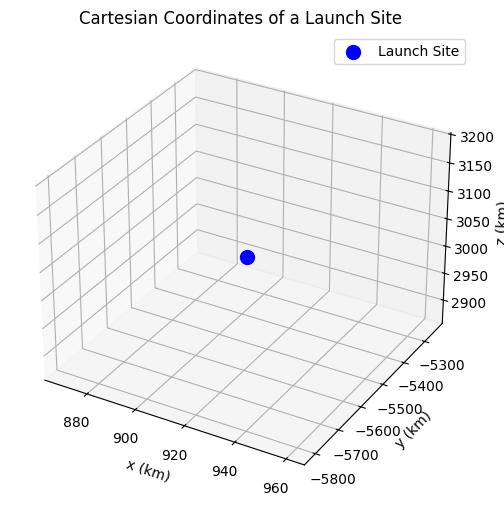

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Example geographic coordinates (latitude and longitude in degrees, altitude in km)
# Let's say we have a launch site: Cape Canaveral
latitude = 28.3922   # degrees North
longitude = -80.6077  # degrees West
altitude = 0.03      # km above sea level (approximately)

# Earth's radius in km (WGS84 average radius)
R_E = 6371

# Convert latitude and longitude to radians
lat_rad = np.radians(latitude)
lon_rad = np.radians(longitude)

# Convert geographic coordinates to spherical coordinates:
# r = R_E + altitude, theta = 90° - latitude, phi = longitude
r = R_E + altitude
theta = np.radians(90 - latitude)
phi = lon_rad

# Convert spherical coordinates to Cartesian coordinates:
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

print("Cartesian Coordinates of the launch site:")
print("x =", x, "km")
print("y =", y, "km")
print("z =", z, "km")

# For visualization, plot the launch site on a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='blue', s=100, label='Launch Site')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_zlabel('z (km)')
ax.set_title('Cartesian Coordinates of a Launch Site')
ax.legend()
plt.show()


## Supplemental: Converting Geographic Coordinates to Cartesian Coordinates

Accurate positioning is essential for aerospace operations, from launching vehicles to planning recovery sites. In this supplemental section, we explain how to convert geographic coordinates—latitude, longitude, and altitude—into spherical and Cartesian coordinates. These conversions allow engineers to perform trajectory simulations, orbit determinations, and other calculations more naturally in a mathematical framework.

---

### Geographic Coordinates

Geographic coordinates specify a location on Earth with three components:
- **Latitude ($\varphi$):**  
  The angle measured north or south of the equator. Positive values indicate north, while negative values indicate south.
- **Longitude ($\lambda$):**  
  The angle measured east or west from a prime meridian (commonly Greenwich). Positive values are east, and negative values are west.
- **Altitude ($h$):**  
  The height above a reference level, typically mean sea level.

For example, a launch site might have:
- Latitude: $28.3922^\circ$ N  
- Longitude: $-80.6077^\circ$ W  
- Altitude: $0.03$ km

---

### Step 1: Convert Geographic to Spherical Coordinates

In spherical coordinates, a point is defined as $(r, \theta, \phi)$ where:
- **$r$ (radius):**  
  The distance from the center of the Earth.  
  \[
  r = R_E + h
  \]
  where $R_E$ is the Earth's average radius (approximately $6371$ km).

- **$\theta$ (polar angle or colatitude):**  
  Measured from the positive $z$-axis (north pole). Since geographic latitude is measured from the equator, we have:
  \[
  \theta = 90^\circ - \varphi \quad \text{(or in radians, } \theta = \frac{\pi}{2} - \varphi \text{)}
  \]

- **$\phi$ (azimuthal angle):**  
  Directly corresponds to the geographic longitude:
  \[
  \phi = \lambda
  \]

*Note:* Ensure that angles are converted to radians when using trigonometric functions.

---

### Step 2: Convert Spherical to Cartesian Coordinates

Once you have the spherical coordinates $(r, \theta, \phi)$, you can convert them to Cartesian coordinates $(x, y, z)$ using the following formulas:

\[
x = r \sin\theta \cos\phi,
\]
\[
y = r \sin\theta \sin\phi,
\]
\[
z = r \cos\theta.
\]

Using the identities:
\[
\sin\left(\frac{\pi}{2} - \varphi\right) = \cos\varphi \quad \text{and} \quad \cos\left(\frac{\pi}{2} - \varphi\right) = \sin\varphi,
\]
these equations can be rewritten in a form that is commonly used in geodetic applications:

\[
x = (R_E + h) \cos\varphi \cos\lambda,
\]
\[
y = (R_E + h) \cos\varphi \sin\lambda,
\]
\[
z = (R_E + h) \sin\varphi.
\]

Here:
- **$\varphi$** is the geographic latitude (converted to radians),
- **$\lambda$** is the geographic longitude (converted to radians), and
- **$h$** is the altitude.

---

### Practical Example

Consider a launch site with:
- Latitude: $28.3922^\circ$ N
- Longitude: $-80.6077^\circ$ W
- Altitude: $0.03$ km

**Conversion Steps:**

1. **Convert Degrees to Radians:**
   \[
   \varphi \approx 28.3922^\circ \approx 0.4955 \text{ radians}, \quad \lambda \approx -80.6077^\circ \approx -1.4073 \text{ radians}.
   \]

2. **Compute $r$:**
   \[
   r = 6371\, \text{km} + 0.03\, \text{km} \approx 6371.03\, \text{km}.
   \]

3. **Calculate Cartesian Coordinates:**
   \[
   x = 6371.03 \cdot \cos(0.4955) \cdot \cos(-1.4073),
   \]
   \[
   y = 6371.03 \cdot \cos(0.4955) \cdot \sin(-1.4073),
   \]
   \[
   z = 6371.03 \cdot \sin(0.4955).
   \]

These coordinates specify the position of the launch site in an Earth-Centered Cartesian coordinate system, which is crucial for further aerospace computations like trajectory simulations.

---

### Summary

- **Geographic Coordinates:**  
  $(\varphi, \lambda, h)$ define a location on Earth.
  
- **Spherical Coordinates Conversion:**
  \[
  r = R_E + h, \quad \theta = \frac{\pi}{2} - \varphi, \quad \phi = \lambda.
  \]

- **Cartesian Coordinates Conversion:**
  \[
  x = (R_E+h) \cos\varphi \cos\lambda, \quad y = (R_E+h) \cos\varphi \sin\lambda, \quad z = (R_E+h) \sin\varphi.
  \]

Understanding these conversions is essential in aerospace operations where geographic coordinates (used for specifying launch and recovery sites) must be translated into mathematical coordinate systems suitable for detailed trajectory and orbital analyses.

---

*Interactive Exercise:*  
Try implementing these conversion formulas in Python to convert the geographic coordinates of your favorite launch site into Cartesian coordinates.


Cartesian coordinates (km):
x = 914.6466311780812
y = -5529.544149255072
z = 3029.4531358668664


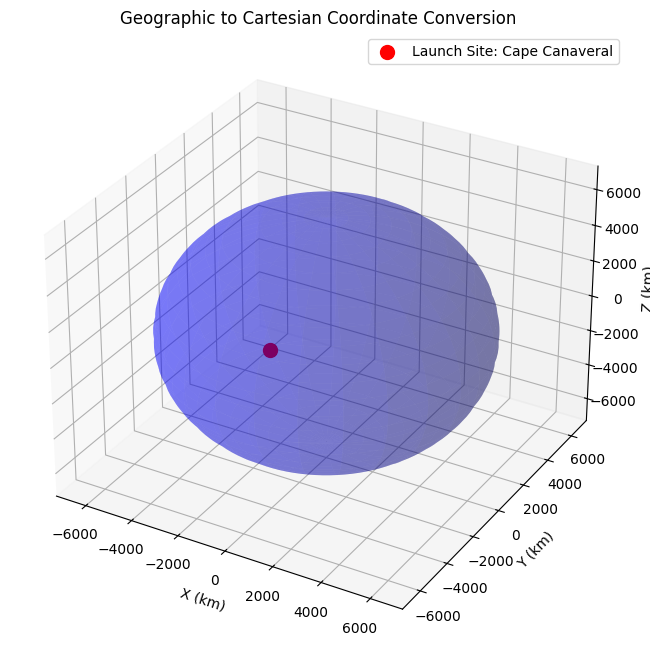

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# Earth's average radius in kilometers (WGS84)
R_E = 6371

# Geographic coordinates for a launch site (Cape Canaveral)
lat_deg = 28.3922   # Latitude in degrees North
lon_deg = -80.6077  # Longitude in degrees West
alt = 0.03          # Altitude in km above sea level (approx. 30 m)

# Convert latitude and longitude from degrees to radians
lat = np.radians(lat_deg)
lon = np.radians(lon_deg)

# Compute the radial distance from Earth's center
r = R_E + alt

# Convert geographic coordinates to Cartesian coordinates
# Using the formulas:
#   x = (R_E + h) * cos(lat) * cos(lon)
#   y = (R_E + h) * cos(lat) * sin(lon)
#   z = (R_E + h) * sin(lat)
x = r * np.cos(lat) * np.cos(lon)
y = r * np.cos(lat) * np.sin(lon)
z = r * np.sin(lat)

print("Cartesian coordinates (km):")
print("x =", x)
print("y =", y)
print("z =", z)

# Now, create a 3D plot to visualize the conversion.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a mesh for the Earth sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = R_E * np.outer(np.cos(u), np.sin(v))
y_sphere = R_E * np.outer(np.sin(u), np.sin(v))
z_sphere = R_E * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the Earth as a translucent blue sphere
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.3, rstride=4, cstride=4, edgecolor='none')

# Plot the launch site on the Earth as a red point
ax.scatter(x, y, z, color='r', s=100, label='Launch Site: Cape Canaveral')

# Set labels and title
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('Geographic to Cartesian Coordinate Conversion')
ax.legend()

plt.show()


### 2.3 Vectors and Vector Operations

**Overview:**  
Vectors are mathematical objects that possess both magnitude (size) and direction. They are indispensable in physics and engineering for representing quantities such as displacement, velocity, acceleration, and force. In aerospace engineering, vectors help us describe trajectories, combine forces, and analyze rotations.

In this section, we will cover:

1. **Definition and Notation**  
2. **Basic Operations**  
   - Vector Addition  
   - Scalar Multiplication  
   - Magnitude and Unit Vectors  
3. **Dot Product (Scalar Product)**  
4. **Cross Product (Vector Product)** *(for 3D applications)*  
5. **Vector Projections**  
6. **Relevance to Aerospace Calculations**

---

#### 2.3.1 Definition and Notation

A **vector** is an entity defined by both a magnitude and a direction. It is typically represented in bold (e.g., **v**) or with an arrow above the letter ($\vec{v}$). In a 2D Cartesian coordinate system, a vector can be expressed as:
$$
\vec{v} = \langle v_x,\, v_y \rangle,
$$
where $v_x$ and $v_y$ are the components along the $x$-axis and $y$-axis, respectively.

A **scalar** is a quantity that has only magnitude (for example, temperature or mass). Unlike vectors, scalars are represented by single numbers.

**Visual Representation:**  
In diagrams, vectors are drawn as arrows. The arrow’s length represents the vector’s magnitude, while its direction shows the vector’s direction.

---

#### 2.3.2 Basic Operations

**Vector Addition:**  
To add two vectors, add their corresponding components:
$$
\vec{u} = \langle u_x,\, u_y \rangle, \quad \vec{v} = \langle v_x,\, v_y \rangle \quad \Longrightarrow \quad \vec{u} + \vec{v} = \langle u_x + v_x,\, u_y + v_y \rangle.
$$

**Scalar Multiplication:**  
Multiplying a vector by a scalar $k$ scales its magnitude without changing its direction:
$$
k\,\vec{v} = \langle k\,v_x,\, k\,v_y \rangle.
$$

**Magnitude (Norm):**  
The magnitude or length of a vector $\vec{v} = \langle v_x, v_y \rangle$ is computed as:
$$
\|\vec{v}\| = \sqrt{v_x^2 + v_y^2}.
$$

**Unit Vectors:**  
A unit vector has a magnitude of 1 and indicates direction. The unit vector in the direction of $\vec{v}$ is:
$$
\hat{v} = \frac{\vec{v}}{\|\vec{v}\|}.
$$

**Example:**  
Let $\vec{A} = \langle 3, 0 \rangle$ and $\vec{B} = \langle 0, 4 \rangle$. Then,
$$
\vec{A} + \vec{B} = \langle 3, 4 \rangle \quad \text{and} \quad \|\vec{A} + \vec{B}\| = \sqrt{3^2 + 4^2} = 5.
$$

---

#### 2.3.3 Dot Product (Scalar Product)

The **dot product** of two vectors provides a measure of how much they point in the same direction.

**Definition:**  
For two vectors, 
$$
\vec{u} = \langle u_x, u_y \rangle \quad \text{and} \quad \vec{v} = \langle v_x, v_y \rangle,
$$  
the dot product is defined as:
$$
\vec{u} \cdot \vec{v} = u_x v_x + u_y v_y.
$$

**Geometric Interpretation:**  
It can also be expressed in terms of the vectors’ magnitudes and the cosine of the angle $\theta$ between them:
$$
\vec{u} \cdot \vec{v} = \|\vec{u}\|\,\|\vec{v}\|\cos\theta.
$$  
Thus, the angle between the vectors is given by:
$$
\cos\theta = \frac{\vec{u} \cdot \vec{v}}{\|\vec{u}\|\,\|\vec{v}\|}.
$$

**Applications:**  
- **Determining Orthogonality:** Two vectors are perpendicular if $\vec{u} \cdot \vec{v} = 0$.
- **Projection:** The projection of $\vec{u}$ onto $\vec{v}$ is:
$$
\text{proj}_{\vec{v}} \vec{u} = \left(\frac{\vec{u} \cdot \vec{v}}{\|\vec{v}\|^2}\right)\vec{v}.
$$

---

#### 2.3.4 Cross Product (Vector Product)

*Note:* The cross product is defined only in three-dimensional space.

**Definition:**  
For vectors $\vec{u} = \langle u_x, u_y, u_z \rangle$ and $\vec{v} = \langle v_x, v_y, v_z \rangle$, the cross product is given by:
$$
\vec{u} \times \vec{v} = \langle u_y v_z - u_z v_y,\; u_z v_x - u_x v_z,\; u_x v_y - u_y v_x \rangle.
$$

**Geometric Interpretation:**  
- The magnitude of $\vec{u} \times \vec{v}$ is:
$$
\|\vec{u} \times \vec{v}\| = \|\vec{u}\|\,\|\vec{v}\|\sin\theta,
$$  
where $\theta$ is the angle between $\vec{u}$ and $\vec{v}$.
- The resulting vector is perpendicular to both $\vec{u}$ and $\vec{v}$, following the right-hand rule.

**Applications:**  
The cross product is often used in aerospace for calculating torques and rotational effects on spacecraft.

---

#### 2.3.5 Vector Projections

**Concept:**  
Projecting one vector onto another decomposes the first vector into a component parallel to the second vector and a component perpendicular to it.

**Formula:**  
The projection of $\vec{u}$ onto $\vec{v}$ is:
$$
\text{proj}_{\vec{v}} \vec{u} = \left(\frac{\vec{u} \cdot \vec{v}}{\|\vec{v}\|^2}\right)\vec{v}.
$$

**Relevance:**  
This operation is particularly useful in resolving forces along specific directions, such as breaking down gravitational or thrust forces into components.

---

#### 2.3.6 Relevance to Aerospace Calculations

Vectors are essential in aerospace engineering because they:
- Represent positions, velocities, and accelerations in space.
- Allow the decomposition and recombination of forces acting on a spacecraft.
- Enable analysis of rotational motion and torques.
- Facilitate coordinate transformations between different reference frames.

A solid grasp of vector operations enables you to analyze flight dynamics, compute trajectory corrections, and design control systems for spacecraft.

---

#### 2.3.7 Summary of Key Vector Formulas

- **Vector Representation (2D):**  
  $\displaystyle \vec{v} = \langle v_x,\, v_y \rangle$



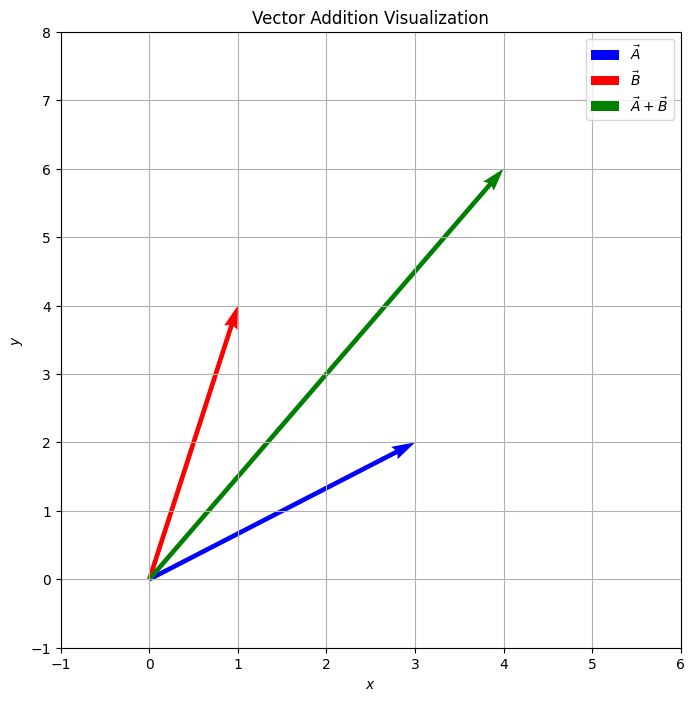

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define two 2D vectors A and B
A = np.array([3, 2])  # Example vector A
B = np.array([1, 4])  # Example vector B

# Compute the resultant vector (A + B)
R = A + B

plt.figure(figsize=(8, 8))
origin = [0, 0]

# Plot vector A
plt.quiver(*origin, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='blue', label=r'$\vec{A}$')
# Plot vector B
plt.quiver(*origin, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='red', label=r'$\vec{B}$')
# Plot the resultant vector (A+B)
plt.quiver(*origin, R[0], R[1], angles='xy', scale_units='xy', scale=1, color='green', label=r'$\vec{A}+\vec{B}$')

plt.xlim(-1, 6)
plt.ylim(-1, 8)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Vector Addition Visualization')
plt.grid(True)
plt.legend()
plt.show()



Dot product: 11
Angle between A and B (degrees): 42.27368900609373


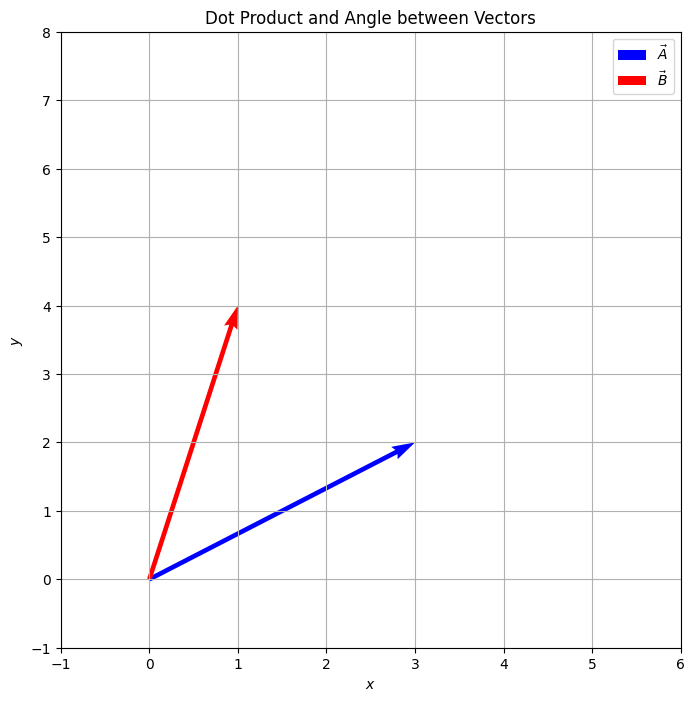

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define two 2D vectors A and B
A = np.array([3, 2])
B = np.array([1, 4])

# Compute the dot product
dot_product = np.dot(A, B)

# Calculate the magnitudes of A and B
mag_A = np.linalg.norm(A)
mag_B = np.linalg.norm(B)

# Compute the angle between A and B in radians and then convert to degrees
theta = np.arccos(dot_product / (mag_A * mag_B))
theta_deg = np.degrees(theta)

print("Dot product:", dot_product)
print("Angle between A and B (degrees):", theta_deg)

# Plot vectors A and B to visualize the angle between them
plt.figure(figsize=(8, 8))
origin = [0, 0]
plt.quiver(*origin, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='blue', label=r'$\vec{A}$')
plt.quiver(*origin, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='red', label=r'$\vec{B}$')

plt.xlim(-1, 6)
plt.ylim(-1, 8)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Dot Product and Angle between Vectors')
plt.grid(True)
plt.legend()
plt.show()


### 2.4 Introduction to Calculus

Calculus is the mathematics of continuous change. In this section, we cover the fundamentals of Calculus I—limits, derivatives, and integrals—with a focus on the concepts and formulas essential for understanding the physics and engineering behind spacecraft motion. This review is intended to give you a solid foundation such that you could, in principle, pass a college-level Calculus I exam and apply these ideas in later aerospace topics.

---

#### 2.4.1 Limits

**Definition:**  
The limit of a function describes its behavior as the input approaches a particular value. Formally, we write:
$$
\lim_{x \to a} f(x) = L
$$
if for every number $\epsilon > 0$, there exists a $\delta > 0$ such that whenever $0 < |x - a| < \delta$, it follows that $|f(x) - L| < \epsilon$.

**Key Examples:**  
- **Basic Limit:**  
  $$
  \lim_{x \to 0} \frac{\sin(x)}{x} = 1.
  $$
- **One-Sided Limits:**  
  Limits from the right and left, denoted as $\lim_{x\to a^+}$ and $\lim_{x\to a^-}$, respectively.

**Why Limits Matter:**  
Limits allow us to define the derivative (the instantaneous rate of change) and the definite integral (accumulated area under a curve). While a rigorous epsilon–delta proof is beyond our scope here, understanding the idea of “approaching a value” is crucial.

---

#### 2.4.2 Derivatives

**Definition (Rate of Change):**  
The derivative of a function $f(x)$ at a point $x$ is defined as:
$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}.
$$
This represents the slope of the tangent line to the graph of $f(x)$ at the point $(x, f(x))$.

**Basic Rules and Formulas:**

1. **Constant Rule:**  
   $$
   \frac{d}{dx} (c) = 0.
   $$

2. **Power Rule:**  
   $$
   \frac{d}{dx}(x^n) = n\, x^{n-1}.
   $$

3. **Sum Rule:**  
   $$
   \frac{d}{dx}\big[f(x) + g(x)\big] = f'(x) + g'(x).
   $$

4. **Product Rule:**  
   $$
   \frac{d}{dx}\big[u(x)v(x)\big] = u'(x)v(x) + u(x)v'(x).
   $$

5. **Quotient Rule:**  
   $$
   \frac{d}{dx}\left(\frac{u(x)}{v(x)}\right) = \frac{u'(x)v(x) - u(x)v'(x)}{[v(x)]^2}.
   $$

6. **Chain Rule:**  
   For a composite function $h(x)=f(g(x))$,
   $$
   h'(x) = f'(g(x))\cdot g'(x).
   $$

**Common Derivatives:**
- $\frac{d}{dx} \, \sin(x) = \cos(x)$  
- $\frac{d}{dx} \, \cos(x) = -\sin(x)$  
- $\frac{d}{dx} \, e^x = e^x$  
- $\frac{d}{dx} \, \ln(x) = \frac{1}{x}$

**Applications:**  
Derivatives are used to find tangent lines, optimize functions (e.g., to maximize performance or minimize fuel consumption), and describe instantaneous rates such as velocity and acceleration in physics.

---

#### 2.4.3 Applications of Derivatives

**Tangent Lines:**  
The tangent line to the curve $y=f(x)$ at $x=a$ is given by:
$$
y = f(a) + f'(a)(x-a).
$$

**Optimization:**  
Using derivatives to find local maxima and minima—critical in engineering for optimizing trajectories and fuel usage.

**Motion:**  
- **Velocity:** $v(t) = \frac{d}{dt}\, s(t)$, where $s(t)$ is the position.
- **Acceleration:** $a(t) = \frac{d}{dt}\, v(t)$.

---

#### 2.4.4 Integrals

**Indefinite Integrals (Antiderivatives):**  
An antiderivative $F(x)$ of $f(x)$ satisfies:
$$
F'(x) = f(x).
$$  
The general form includes an arbitrary constant $C$:
$$
\int f(x) \, dx = F(x) + C.
$$

**Definite Integrals and the Fundamental Theorem of Calculus:**  
The definite integral of $f(x)$ from $a$ to $b$ is defined as:
$$
\int_a^b f(x)\,dx = F(b) - F(a),
$$
where $F(x)$ is any antiderivative of $f(x)$.

**Basic Integration Rules:**

1. **Power Rule:**  
   $$
   \int x^n \, dx = \frac{x^{n+1}}{n+1} + C,\quad n \neq -1.
   $$

2. **Logarithm Rule:**  
   $$
   \int \frac{1}{x}\,dx = \ln |x| + C.
   $$

3. **Exponential Function:**  
   $$
   \int e^x\,dx = e^x + C.
   $$

4. **Trigonometric Functions:**  
   $$
   \int \sin(x)\,dx = -\cos(x) + C, \quad \int \cos(x)\,dx = \sin(x) + C.
   $$

**Techniques of Integration:**  
While methods like integration by parts, partial fractions, and trigonometric substitution exist, they are generally not the focus for our aerospace applications. We concentrate on the rules above and u-substitution (change of variables) since these are most directly applicable to calculating quantities like work, energy, and displacement in physics.

---

#### 2.4.5 Riemann Sums and the Definite Integral

The definite integral can be understood as the limit of Riemann sums:
$$
\int_a^b f(x)\,dx = \lim_{n\to\infty} \sum_{i=1}^n f(x_i^*) \Delta x,
$$
where the interval $[a,b]$ is divided into $n$ subintervals of width $\Delta x$ and $x_i^*$ is a sample point in each subinterval.

This concept is fundamental to understanding how integration accumulates small contributions over an interval, such as computing the area under a curve.

---

#### 2.4.6 Summary of Key Calculus Formulas

- **Limits:**
  - $\displaystyle \lim_{x\to a} f(x) = L$
  - $\displaystyle \lim_{x \to 0} \frac{\sin x}{x} = 1$
- **Derivatives:**
  - Definition: $\displaystyle f'(x) = \lim_{h\to 0}\frac{f(x+h)-f(x)}{h}$
  - Power Rule: $\displaystyle \frac{d}{dx}(x^n)=nx^{n-1}$
  - Product Rule: $\displaystyle (uv)' = u'v+uv'$
  - Quotient Rule: $\displaystyle \left(\frac{u}{v}\right)' = \frac{u'v-uv'}{v^2}$
  - Chain Rule: $\displaystyle \frac{d}{dx}f(g(x))=f'(g(x))g'(x)$
  - Common Functions: $\displaystyle \frac{d}{dx}\sin x = \cos x$, $\displaystyle \frac{d}{dx}\cos x = -\sin x$, $\displaystyle \frac{d}{dx}e^x = e^x$, $\displaystyle \frac{d}{dx}\ln x = \frac{1}{x}$
- **Integrals:**
  - Indefinite Integral: $\displaystyle \int f(x)\,dx = F(x)+C$
  - Definite Integral (Fundamental Theorem): $\displaystyle \int_a^b f(x)\,dx = F(b)-F(a)$
  - Power Rule: $\displaystyle \int x^n\,dx=\frac{x^{n+1}}{n+1}+C$
  - $\displaystyle \int \frac{1}{x}\,dx = \ln|x|+C$
  - $\displaystyle \int e^x\,dx = e^x+C$
  - $\displaystyle \int \sin x\,dx = -\cos x+C$, $\displaystyle \int \cos x\,dx = \sin x+C$

**Note:**  
Topics such as series, multivariable calculus, and more advanced integration techniques (like integration by parts or partial fractions) are not covered in detail because they are beyond the scope of this curriculum. Our focus is on the Calculus I topics that directly support understanding motion, forces, and energy in aerospace applications.

---

#### 2.4.7 Relevance to Aerospace Calculations

- **Differentiation in Motion:**  
  Derivatives provide the tools to calculate velocity and acceleration from position functions, which are essential for designing and analyzing launch trajectories and orbital paths.

- **Integration for Accumulation:**  
  Integrals are used to compute quantities such as displacement, work done by forces, and the areas under curves in thrust vs. time graphs. They are key to energy calculations and fuel consumption estimates.

This comprehensive review of Calculus I should equip you with the mathematical tools needed for further study in orbital mechanics and aerospace engineering.

---

*The following interactive Python cells will help reinforce these concepts with concrete examples and visualizations.*


Function: f(x) = sin(x)
Derivative: f'(x) = cos(x)


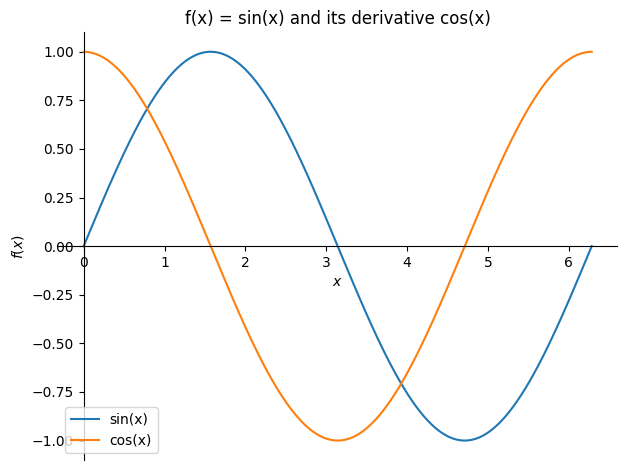

In [10]:
import sympy as sp

# Define the symbol and function
x = sp.symbols('x')
f = sp.sin(x)

# Compute the derivative of f(x)
f_prime = sp.diff(f, x)

# Display the function and its derivative
print("Function: f(x) =", sp.pretty(f))
print("Derivative: f'(x) =", sp.pretty(f_prime))

# Optional: Plot the function and its derivative using sympy's plotting tools
sp.plot(f, f_prime, (x, 0, 2*sp.pi), legend=True, title='f(x) = sin(x) and its derivative cos(x)')


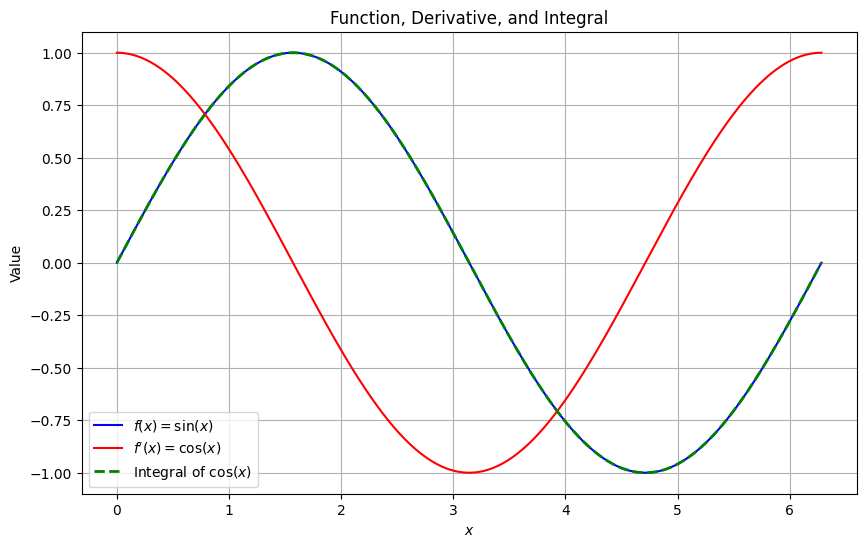

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Define the function f(x) = sin(x)
x_vals = np.linspace(0, 2 * np.pi, 500)
f_vals = np.sin(x_vals)

# Compute the derivative using numpy (should be cos(x))
f_derivative_vals = np.cos(x_vals)

# Compute the integral of cos(x) numerically using cumulative trapezoidal integration.
f_integral_vals = integrate.cumulative_trapezoid(f_derivative_vals, x_vals, initial=0)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label=r'$f(x)=\sin(x)$', color='blue')
plt.plot(x_vals, f_derivative_vals, label=r"$f'(x)=\cos(x)$", color='red')
plt.plot(x_vals, f_integral_vals, label=r'Integral of $\cos(x)$', color='green', linestyle='--', linewidth=2)
plt.title('Function, Derivative, and Integral')
plt.xlabel(r'$x$')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
